In [1]:
using DelimitedFiles
using CSV, DataFrames
using PyPlot
pygui(true)

true

In [2]:
file_path = joinpath("input", "Lab1_clean.csv")

df = CSV.read(file_path, DataFrame; delim=';', missingstring="")
data = Matrix(df)  # convert to matrix

1447×1928 Matrix{Float64}:
 -0.9375    11.4531     10.6406   …   -2.96875    -3.57812   -3.89062
  9.14062   -5.9375     13.6562        1.70312    -5.875     -0.65625
  2.46875    4.70312    -1.42188      -4.82812     6.71875    5.78125
 10.4844     3.76562    -4.34375       3.03125     4.15625   -1.89062
  6.65625   -5.0625      3.26562     -11.1562     -0.515625  -2.79688
  8.07812    9.96875     3.54688  …   -3.98438    -2.6875    10.5938
  2.48438    3.04688    -3.95312      -4.32812    -0.078125  -1.5625
  9.67188    7.34375     5.1875        3.23438     3.84375    5.10938
 -3.09375    0.484375   -4.35938      -6.67188    -2.54688   -4.17188
  0.234375  -7.23438     4.03125      -6.5       -11.3594     1.92188
  ⋮                               ⋱    ⋮                     
  0.359375   4.0625    -10.1406       -4.90625     2.78125   -1.53125
  1.48438   -0.4375     -5.6875        0.5625      1.29688    1.09375
  4.64062   -1.5625      9.51562  …    0.046875    4.54688   -0.15625
  2

In [3]:
# Inspect size and a few values
println(size(data))
println(data[1:5, 1:5])

(1447, 1928)
[-0.9375 11.453125 10.640625 7.109375 1.953125; 9.140625 -5.9375 13.65625 7.3125 1.15625; 2.46875 4.703125 -1.421875 1.109375 5.359375; 10.484375 3.765625 -4.34375 -0.890625 6.796875; 6.65625 -5.0625 3.265625 2.265625 4.8125]


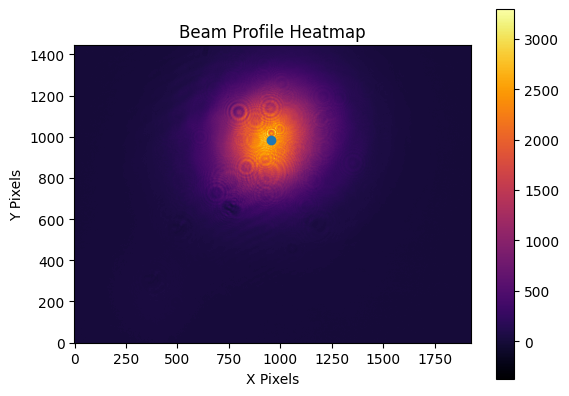

In [12]:
figure()
imshow(data, cmap="inferno", origin="lower")
plot(954, 986, marker="o")
colorbar()
title("Beam Profile Heatmap")
xlabel("X Pixels")
ylabel("Y Pixels")
# xlim(500, 1500)
# ylim(600, 1400)
gcf()

In [5]:
println(maximum(data))

3293.578125


In [6]:
using Statistics

# Define pixel size (meters per pixel)
dx = 5e-6  # example: adjust for your system
nx, ny = size(data)

# Find index of maximum intensity
max_index = argmax(data)  # returns CartesianIndex(row, col)
row_max, col_max = (954, 986)#Tuple(max_index)

# Create coordinate grid centered around zero
x = ((1:nx) .- row_max) .* dx
y = ((1:ny) .- col_max) .* dx

# Compute radius matrix
R = [sqrt(xi^2 + yi^2) for xi in x, yi in y]

# Define radial bins
n_bins = 200
r_max = maximum(R)
edges = range(0, stop=r_max, length=n_bins+1)
bin_centers = (edges[1:end-1] .+ edges[2:end]) ./ 2

# Compute azimuthal average for each bin
I_r = zeros(n_bins)
counts = zeros(n_bins)

for i in 1:nx, j in 1:ny
    r_val = R[i,j]
    idx = searchsortedfirst(edges, r_val) - 1
    if idx ≥ 1 && idx ≤ n_bins
        I_r[idx] += data[i,j]
        counts[idx] += 1
    end
end

println(I_r)
I_r ./= counts  # average in each bin


[335473.9375, 1.051145953125e6, 1.713914828125e6, 2.415538125e6, 3.135967921875e6, 3.746948984375e6, 4.38462665625e6, 5.17412453125e6, 5.68646415625e6, 6.276820375e6, 6.81766171875e6, 7.39827775e6, 7.82163740625e6, 8.221670046875e6, 8.662593984375e6, 9.043508375e6, 9.300748609375e6, 9.440576328125e6, 9.706163734375e6, 9.756248890625e6, 9.95154015625e6, 1.00597309375e7, 1.01411245625e7, 1.0120153e7, 1.01195336875e7, 1.005469421875e7, 1.0066695765625e7, 9.9984633125e6, 1.0025795671875e7, 9.9019195e6, 9.83740875e6, 9.845239765625e6, 9.549655359375e6, 9.155186734375e6, 9.079616625e6, 8.90734790625e6, 8.653655375e6, 8.4129724375e6, 8.12462771875e6, 7.923850546875e6, 7.80980940625e6, 7.50432115625e6, 7.234294609375e6, 6.997303109375e6, 6.758300046875e6, 6.442198390625e6, 6.298390319051743e6, 6.01890584375e6, 5.875079890625e6, 5.68559496875e6, 5.3907163125e6, 5.111757895147324e6, 4.922424609375e6, 4.67243171875e6, 4.442616375e6, 4.231049234375e6, 3.9931109375e6, 3.873040765625e6, 3.6731179531

200-element Vector{Float64}:
 2329.680121527778
 2346.307931082589
 2354.278610061813
 2322.6328125
 2333.3094656808034
 2318.6565497370048
 2322.3658136917375
 2309.877022879464
 2278.2308318309297
 2235.3348913817663
    ⋮
    2.6866682022932022
    2.747268251681076
    2.979423019207683
    2.775462042925278
    3.599092741935484
    3.3030150293255134
    3.50951646090535
    3.433266129032258
    2.706818181818182

In [7]:
dr = step(bin_centers)
norm_factor = sum(I_r .* (2π .* bin_centers) .* dr)
I_r_norm = I_r ./ norm_factor
A_r = sqrt.(I_r_norm)

200-element Vector{Float64}:
 426.2218173161406
 427.74016616108156
 428.46609153933974
 425.57666611169594
 426.5536876971288
 425.2122241926085
 425.55220427515445
 424.4064337172584
 421.4891427271081
 417.5022574088277
   ⋮
  14.474199262435537
  14.636527840372601
  15.242409106009061
  14.711439688035544
  16.752670566121072
  16.048808849881787
  16.542881977962278
  16.362183691023933
  14.528376031964077

In [8]:
using Luna
x = collect(range(start=1, stop=200, step=1))
fwhm = 60

gauss  = Maths.gauss.(x; x0=0, power=2, fwhm)

200-element Vector{Float64}:
 0.9992301329658564
 0.9969240862100921
 0.9930924954370359
 0.9877529959958377
 0.980930087668915
 0.9726549474122855
 0.9629651920505327
 0.9519045934537708
 0.9395227492140118
 0.9258747122872905
 ⋮
 4.67532039081593e-13
 3.4756611941470155e-13
 2.579850483115976e-13
 1.9119770860327527e-13
 1.4148222268794215e-13
 1.0453268583744788e-13
 7.71140280134931e-14
 5.6799656986519346e-14
 4.1772366679299685e-14

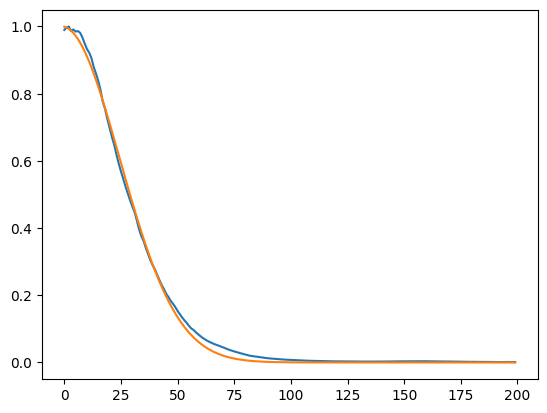

In [9]:
figure()
plot(I_r./maximum(I_r))
plot(gauss)
gcf()